# Project - 1 with linear regression

### Problem Statement

### we need to predict the chance of admission based on the student various scores.

### features or independent variables.

1. GRE Score
2. TOEFL Score
3. University Rating	 
4. SOP		
5. LOR
6. CGPA	
7. Research

Label/target

1. chance of admit 


In [1]:
# Lets start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
data.shape

(500, 9)

In [4]:
#dropping uncounted columns

data = data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
#fill the null values

data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [7]:
# Verify if NAN's are filled

data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Now the data looks good and there are no missing values Also the first column is just serial number So we don't need that column Let's drop it from the data and make it more clean

let's visualize the data and analyze the relationship between independent and dependent variables

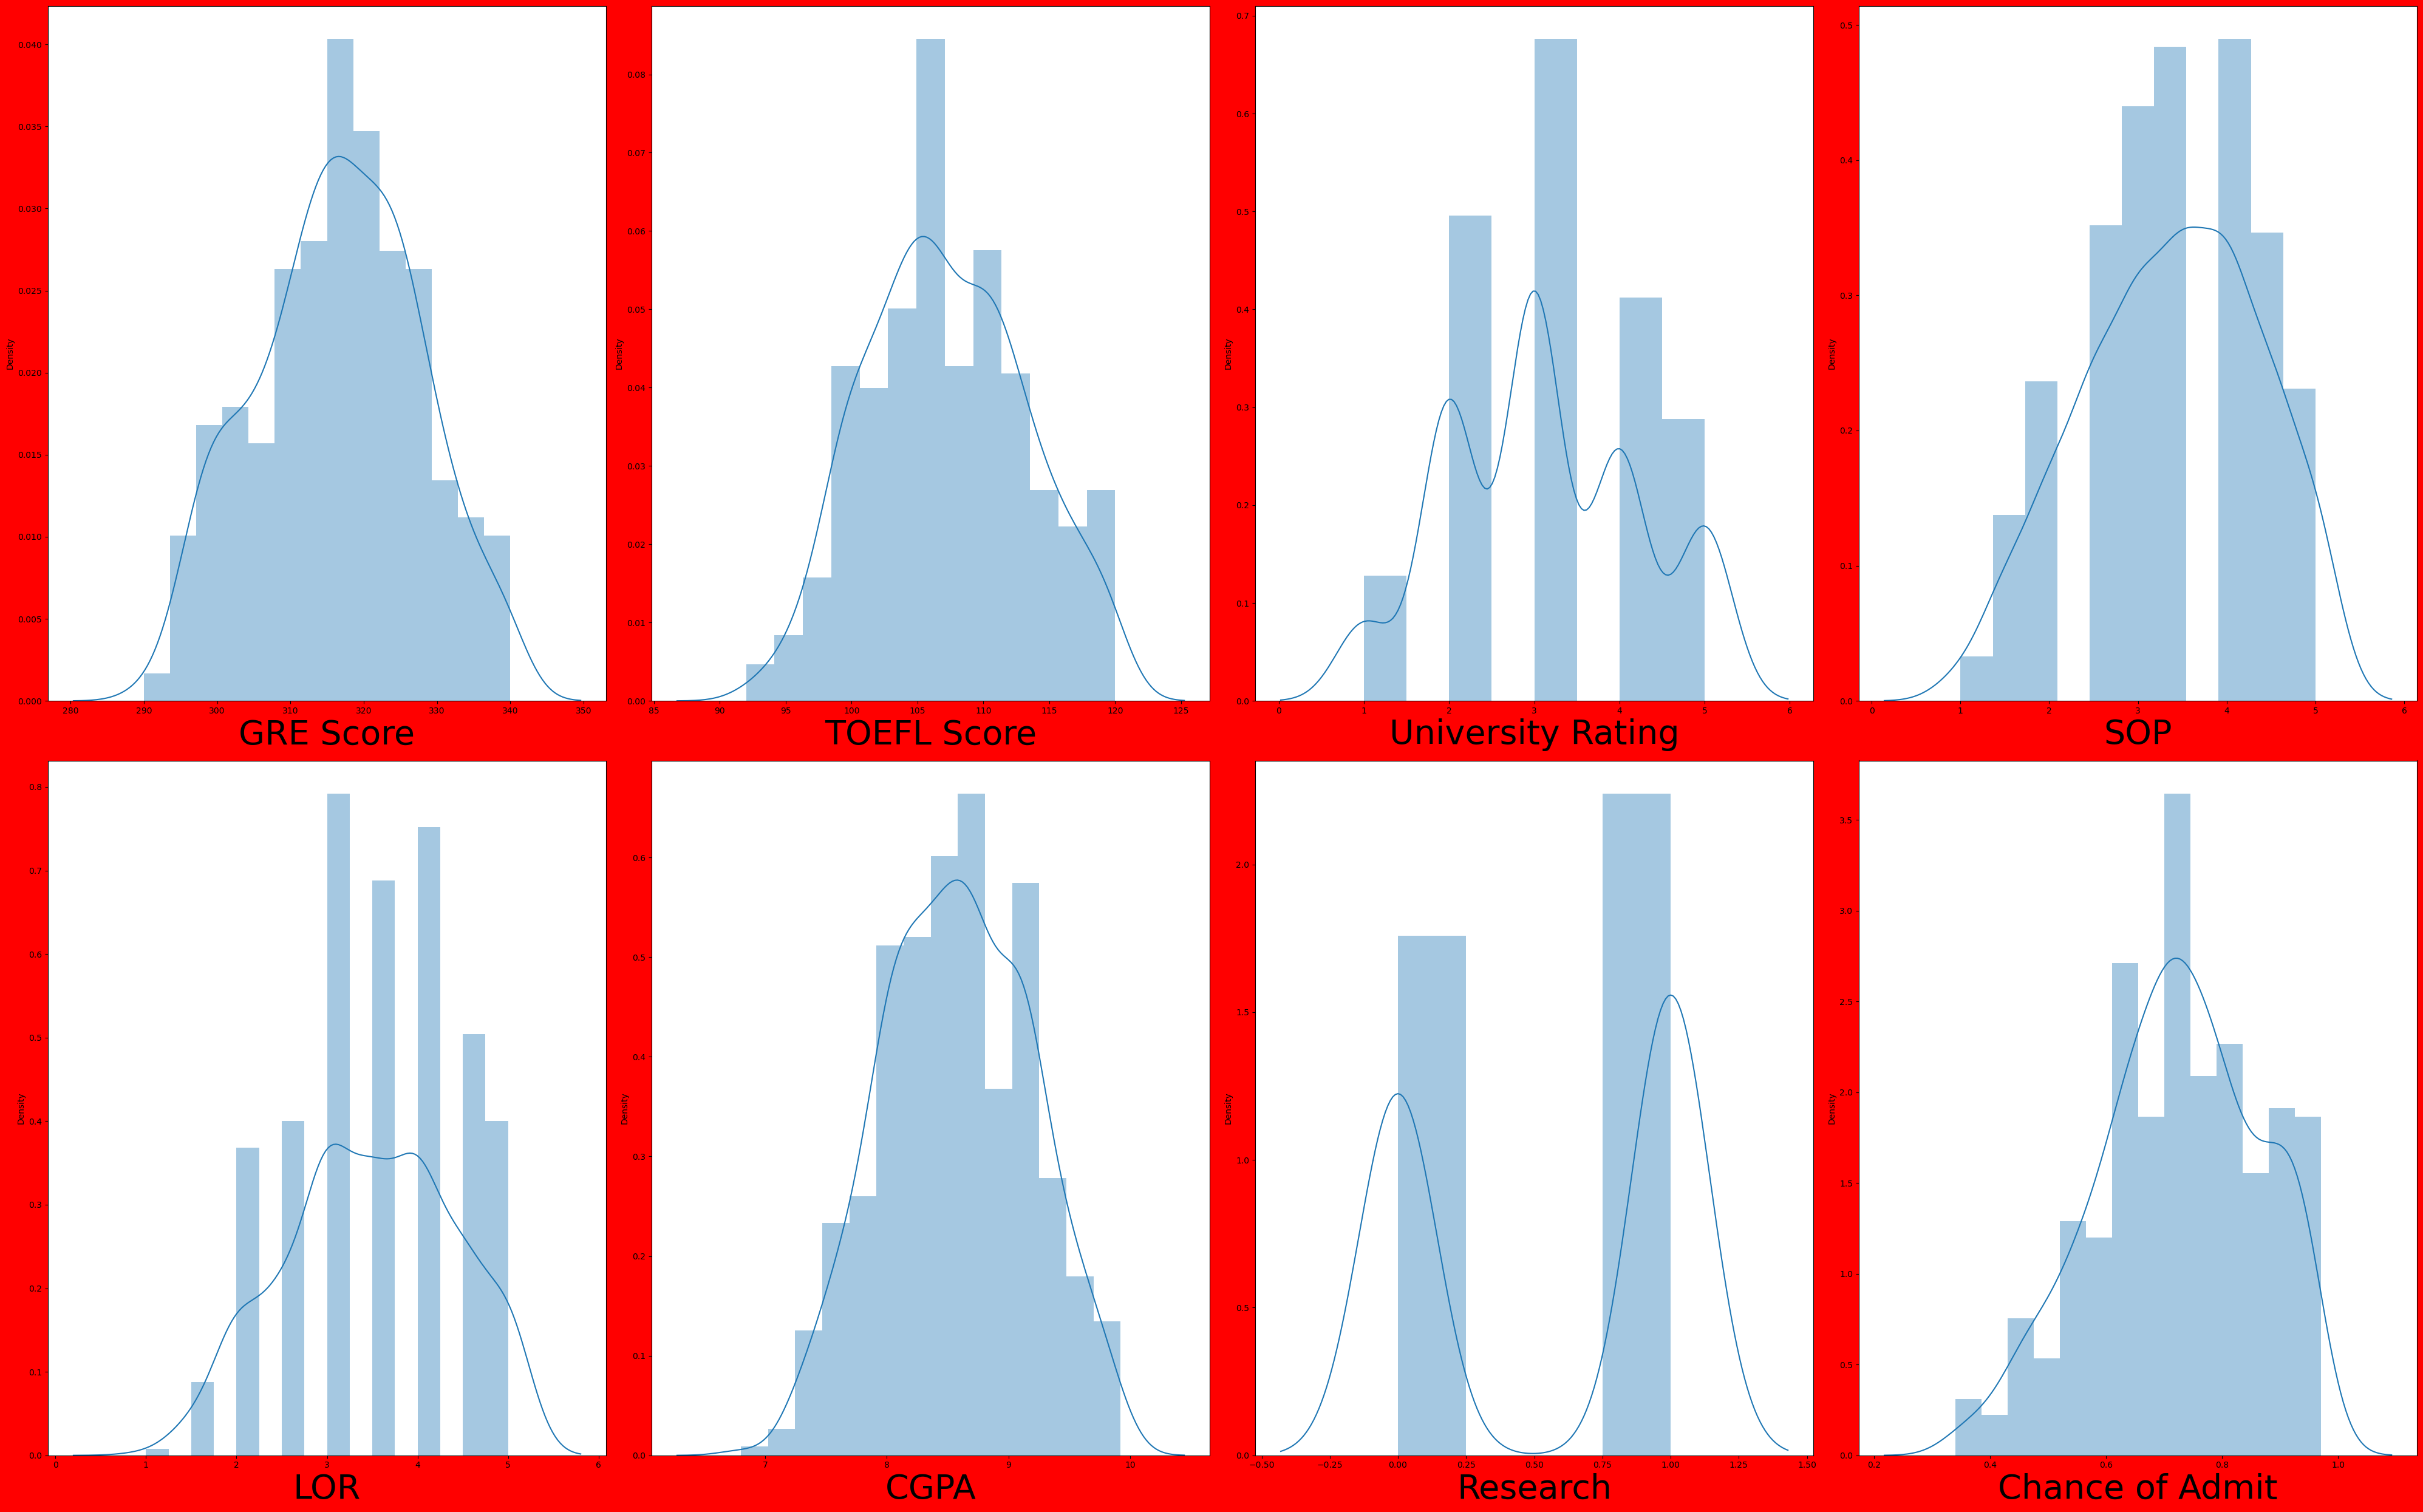

In [8]:
# let's see how data is distributed for every column

plt.figure(figsize= (40,25),facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <= 8:
        ax= plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=40)
        
    plotnumber +=1
    
plt.tight_layout()

the data distributed looks decent and there does not seems to be any skewless. grate Let's go ahead

let's absorb the relationship with the independent variable and dependent variable


In [9]:
# divide data set into features and labels
y = data['Chance of Admit']
X = data.drop(columns=['Chance of Admit'])


In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [11]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


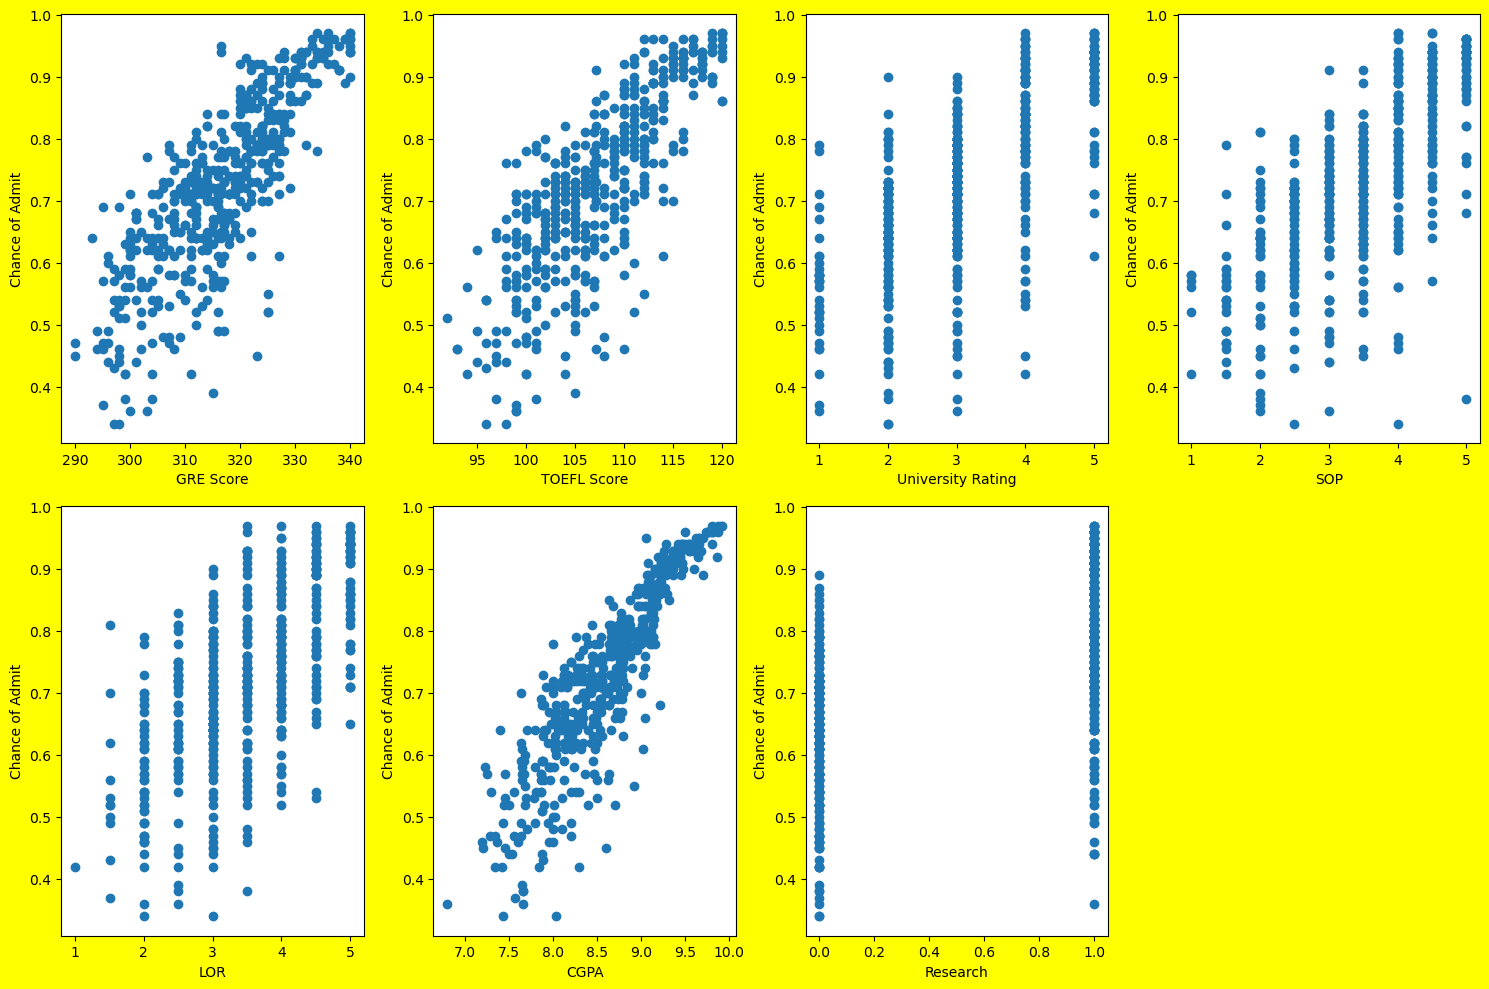

In [12]:
#visualizing relationship

plt.figure(figsize=(15,10), facecolor ='yellow')
plotnumber = 1

for column in X:
    if plotnumber <= 8 :
        ax= plt.subplot(2,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=10)
        plt.ylabel('Chance of Admit', fontsize = 10)
    plotnumber +=1
plt.tight_layout()

great the relationship between the dependent and indepent variable look fairly linear. thus out linearity assumption is satisfied.

In [13]:
#Data scaling formula Z = (X-mean)/std

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

You can also get help within notebook and refer whenever you have any confusion.

In [15]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

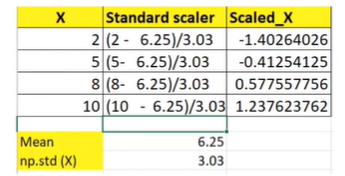

In [16]:
### let's go ahead and use linear regression and see how good it fits our data. but first let's split our data in train and test.

# Train & Test 




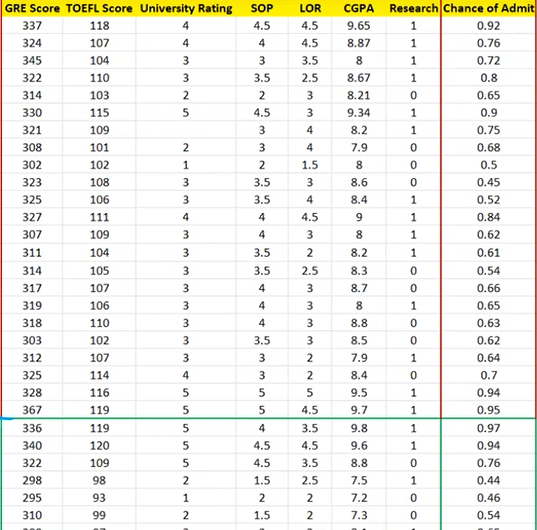

In [17]:
## Spilt data into train and test. Model will be built on training data and tested on test data.
x_train,x_test,y_train,y_test = train_test_split(X_scaled, y , test_size = 0.25, random_state=348)
y_train.head()
# here X_scaled is feature
# y is label

459    0.89
174    0.87
399    0.95
374    0.39
355    0.73
Name: Chance of Admit, dtype: float64

# Model instantiating and training

In [18]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

# Predict the chance of admission given features

In [19]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [20]:
# since we have already fit the scaller , you can transform the data 

print("Chance of Admission is : " , regression.predict(scaler.transform([[327.0,113.0,4.0,4.5,4.5,9.04,0]])))

Chance of Admission is :  [0.82445851]


## you can save the model and later you use it for prediction

In [21]:
#saving the model to the local file system  

pickle.dump(regression, open('reg_model','wb'))

In [22]:
# prediction ising the saved model
Loaded_model = pickle.load(open('reg_model','rb'))

a = Loaded_model.predict(scaler.transform([[314,103,2,2,3,8.21,0]]))

a

array([0.63715829])

In [23]:
# let's try a new window with only pickle model
scaler.transform([[314,103,2,2,3,8.21,0]])

array([[-0.23066792, -0.69273097, -0.99125473, -1.3878618 , -0.52351283,
        -0.6064802 , -1.12815215]])

### let's check how well model fits on train data 



In [24]:
#adjusted R2 score

regression.score(x_train ,y_train)

0.82855357382842

### let's check how well model fits on train data 



In [25]:
regression.score(x_test ,y_test)

0.7928310580010802

### lets plot and visulaize

In [26]:
x_test[3]

array([-0.23066792, -0.85814918,  0.78200955, -0.88281747, -1.60515091,
       -1.15265002,  0.88640526])

In [27]:
y_pred = regression.predict(x_test)
y_pred

array([0.8207641 , 0.94873455, 0.91113259, 0.61044355, 0.66137595,
       0.60352359, 0.83223756, 0.63090419, 0.78083483, 0.76003632,
       0.61343331, 0.5171975 , 0.84481161, 0.47026296, 0.9080331 ,
       0.62012908, 0.73074873, 0.63424789, 0.82329681, 0.57632803,
       0.80849253, 0.75415425, 0.65115419, 0.53199278, 0.55202691,
       0.49318412, 0.8954953 , 0.77677743, 0.72036651, 0.42326242,
       0.82315696, 0.79339286, 0.62530834, 0.67328918, 0.77417537,
       0.63745613, 0.80739236, 0.78788545, 0.58911428, 0.66156995,
       0.73593055, 0.59762008, 0.86327735, 0.94441147, 0.98184889,
       0.51308745, 0.77626965, 0.92424654, 0.63718128, 0.96940982,
       0.65572611, 0.63867889, 0.81411786, 0.73643354, 0.68692311,
       0.55261258, 0.43652872, 0.64497596, 0.68382796, 0.68701788,
       0.86409285, 0.67198884, 0.78792379, 0.65534022, 0.95792159,
       0.61596565, 0.72449619, 0.53769901, 0.59184804, 0.78917924,
       0.74441132, 0.6447335 , 0.99270469, 0.66219368, 0.65200

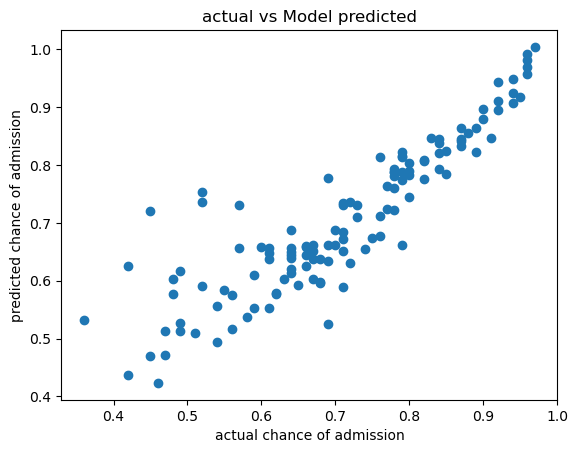

In [28]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual chance of admission')
plt.ylabel('predicted chance of admission')
plt.title('actual vs Model predicted')
plt.show()

### Model Evaluation



1. Mean absolute error (MAE) : Represeponce photographer Harry to click aroundnt average error
    
    
2. Mean squeared error (MSE): similar to MAE but noise is exaggerated to large error as punished. it is harder to interpret than as its not in base unit, however it is generally more popular

3. Root mean squared error (RMSE):- most popular metric, similar to MSE , however the result is square rooted to make it more enterpretable as its in base unit.it is recommended that RMSE be used as the primary metric to interprete

In [29]:
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [30]:
y_pred = regression.predict(x_test)

In [31]:
 #MAE
mean_squared_error(y_test,y_pred)


0.004309172332351597

In [32]:
mean_absolute_error(y_test,y_pred)

0.04421359936541997

In [33]:
np.sqrt(mean_absolute_error(y_test,y_pred))

0.21027030072128583

# You have successfully completed building Linear Regression model

Now let's check if out model is overfitting our data using regularization.

lets see if our model is overfitting out training data 


### Regularization

when we use regression model to train some data There it is a good chance that the model will over faith the given training data set.

my other way to grant a regularization helps sort this over fitting problem by restricting the degrees of freedom of given equation.

i.e  simply reducing the number of degrees of a polynomial function by reducing their corresponding weights

a linear equation We do not want huge weights or coefficients as a small chance in which can make a large difference for the dependent variable(y) regularization constraints the weight of such features to avoid overfitting

tO REGULARIZE the model a Shrinkage Penalty is added to the cost function Lets see the different type of regularization in regression


1. LASSO

2. RIDGE 

3. ELASTICNET (LESS POPULAR)

LASSO( least absolute shrinkage and selection operator ) regression L1 form

lasso regression panelises the model based on the sum of magnitude of the coefficient .

RIDGE regression :
RIDGE regression panelises the movie based on the sum of squares of magnitude of the coefficients





# difference between ridge and lasso



which regression shrinks the coefficients for those predictor which contribute very less in the model but have huge weightage very close to 0 but it never makes them exactly zero Thus the final model will still contain all those predictors through with less weight This does not help in interpreting the model very well This is where glass or regression differs with rich regression In Lasso the L1 penalty does reduce some coefficient exactly position 0 when we use sufficiently large tuning parameter so in addition to regularizing Lasso also perform feature selection.



# why use regularization



regularization helps to reduce the variance of the model without a substantial increase in the bias.

if there is variance in the model that means that the model wont fit well for the data set different than training data the tuning parameter controls this bias and variance tradeoff.

when the value of Lambda is increased up to certain limits.

the model will start losing some important properties which will increase the bias in the data does the selection of the good value of Lambda is the key

the value of Lambda is selected using cross validation method a set of Lambda is selected and cross validation error is calculated for each value of Lambda And that value of Lambda is selected for which the cross validation error is minimum.


## What is Overfitting?


Overfitting is an undesirable machine learning behavior that occurs when the machine learning model gives accurate predictions for training data but not for new data.

When data scientists use machine learning models for making predictions, they first train the model on a known data set.Then, based on this information, the model tries to predict outcomes for new data sets.

An overfit model can give inaccurate predictions and cannot perform well for all types of new data.

In [34]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [35]:
# lasso CV will return best Alpha /Lambda after maximum iteration 
#normalize its subtracting the mean and dividing by L2 Norm

lasscv = LassoCV(alphas = None, max_iter = 10, normalize = True)
lasscv.fit(x_train , y_train)

LassoCV(max_iter=10, normalize=True)

In [37]:
# best alpha parameter is given by .alpha_

alpha = lasscv.alpha_ # 
alpha

3.6581160575233456e-05

In [38]:
#now that we have the best parameter let's use lasso regression and see how well our data has been fitted

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train , y_train)

Lasso(alpha=3.6581160575233456e-05)

In [40]:
lasso_reg.score(x_test , y_test)

0.7929405985679443

In [43]:
# both linear & lasso models are working good which is not overfitted

### Using Ridge regression model

In [41]:
 np.arange(0.001,0.1,0.01)

array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091])

In [45]:
# Ridge will return best alpha and coeffiecient after performing 10 cross validations.

ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01), normalize = True)

ridgecv.fit(x_train , y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [46]:
ridgecv.alpha_

0.011

In [47]:
ridge_model = Ridge(alpha = ridgecv.alpha_ )
ridge_model.fit(x_train , y_train)

Ridge(alpha=0.011)

In [48]:
ridge_model.score(x_train , y_train)

0.8285535730900959

 we got around sameR2 squared using ridge regression as well .
 
 so it is safe to say that there is no overfitting
 
 

### let's see the underlying assumptions
 
 


1. the regression model is linear in terms of coefficient and error terms
 
2. the mean of residuals is 0

3. the error terms are not correlated with each other That is given an error value we cannot predict The next error value.

4. No multicollionearity i.e n independent variables should be correlated with each other or affect one another. if there is multicollionearity, the precision of prediction by the OLS model decreses.

5. the error terms are normally distributed 